A program that reads and processes images for a Random Forest Classifier to classify as images as good, blacked-out, saturated, or blurry.

In [1]:
import numpy as np
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import pickle

import sys
sys.path.insert(0, 'C:/Users/micha/github/uav-image-analysis/scripts/')
import fit_models
os.getcwd()

C:\Users\micha\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


'C:\\Users\\micha\\github\\uav-image-analysis\\methods'

In [2]:
df_train = pd.read_csv('/Users/micha/ea-applications/data/test-images-3.csv')

paths = '/Users/micha/ea-applications/data/training-test-images/Thermal/mytest/*MEDIA/'

train_images, image_list = fit_models.read_images(paths)

y = np.array(df_train['Label'])

y = df_train['Label'].values

X_train, X_test, y_train, y_test = train_test_split(train_images, y, random_state=42, test_size=0.4)

print(df_train.head())
print(X_train.shape)
print(y_train)

(431, 327680)
  Image Date     MEDIA Image_Name  Label
0  2/16/2019  100MEDIA   DJI_0007      0
1  2/16/2019  100MEDIA   DJI_0008      0
2  2/16/2019  100MEDIA   DJI_0009      0
3  2/16/2019  100MEDIA   DJI_0010      0
4  2/16/2019  100MEDIA   DJI_0017      0
(258, 327680)
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [3]:
# Run random forest classifier
model = RandomForestClassifier()
model_logistic, probabilities, y_pred = fit_models.supervised_models(model, X_train, y_train, X_test, y_test)
print(probabilities)

             precision    recall  f1-score   support

          0       0.97      1.00      0.98       167
          1       0.00      0.00      0.00         6

avg / total       0.93      0.97      0.95       173

[0.1 0.  0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.3
 0.  0.  0.  0.  0.  0.  0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.1 0.1 0.
 0.1 0.1 0.  0.  0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.1 0.  0.  0.  0.  0.1 0.  0.  0.  0.  0.1 0.  0.  0.  0.3 0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.  0.  0.  0.  0.  0.4 0.  0.  0.1
 0.  0.  0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.2 0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.3 0.  0.1 0.  0.  0.  0.  0.  0.
 0.  0.  0.2 0.  0.  0.  0.  0.1 0.  0.  0.  0.  0.3 0.1 0.  0.1 0.  0.
 0.1 0.  0.  0.  0.  0.  0.4 0.1 0.2 0.1 0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.  0. ]


C:\Users\micha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [4]:
print(confusion_matrix(y_test, y_pred))

[[167   0]
 [  6   0]]


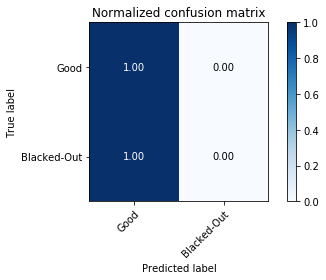

In [5]:
class_labels=['Good', 'Blacked-Out', 'Saturated', 'Blurry']

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#fit_models.plot_confusion_matrix(y_test, y_pred, classes=class_labels,
                      #title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
fit_models.plot_confusion_matrix(y_test, y_pred, classes=class_labels, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [6]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [7]:
type(fit_models)

module

In [8]:
y_pred.shape

(173,)

In [9]:
y_test.shape

(173,)

In [10]:
df_train

,Image Date,MEDIA,Image_Name,Label
0,2/16/2019,100MEDIA,DJI_0007,0
1,2/16/2019,100MEDIA,DJI_0008,0
2,2/16/2019,100MEDIA,DJI_0009,0
3,2/16/2019,100MEDIA,DJI_0010,0
4,2/16/2019,100MEDIA,DJI_0017,0
5,2/16/2019,100MEDIA,DJI_0018,0
6,2/16/2019,100MEDIA,DJI_0019,0
7,2/16/2019,100MEDIA,DJI_0020,0
8,2/16/2019,100MEDIA,DJI_0021,0
9,2/16/2019,100MEDIA,DJI_0027,0
